In [79]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from kneed import KneeLocator

#Loading dataset
file_path = r'C:\Users\snehi\Documents\CDA_Assignments\Assignment 2\processed_data.csv' 
df = pd.read_csv(file_path)
# Peek at the first few rows
print(df.head())

# Check basic info
print("\nShape of dataset:", df.shape)
print("\nColumn names:")
print(df.columns.tolist())


   X  HR_TD_Mean  HR_TD_Median  HR_TD_std  HR_TD_Min  HR_TD_Max  HR_TD_AUC  \
0  0    0.223220      0.198296   0.212179   0.294023   0.240144   0.262526   
1  1    0.200714      0.197505   0.055885   0.335428   0.143726   0.291724   
2  2    0.218023      0.209014   0.058966   0.374094   0.148190   0.175270   
3  3    0.269966      0.261378   0.208461   0.328983   0.274722   0.322617   
4  4    0.155562      0.164997   0.075329   0.256968   0.121402   0.262642   

   HR_TD_Kurtosis  HR_TD_Skew  HR_TD_Slope_min  ...  upset  hostile  alert  \
0        0.039095    0.476637         0.810204  ...      1        1      2   
1        0.098870    0.470914         0.923928  ...      2        1      3   
2        0.072689    0.366113         0.840941  ...      1        1      2   
3        0.054979    0.400393         0.891655  ...      1        1      2   
4        0.130360    0.306012         0.920086  ...      3        1      3   

   ashamed  inspired  nervous  attentive  afraid  active  dete

In [81]:
# Dropping metadata + target columns
meta_cols = ['X', 'Round', 'Phase', 'Individual', 'Puzzler', 'Cohort']
emotion_targets = ['Frustrated', 'upset', 'hostile', 'alert', 'ashamed', 
                   'inspired', 'nervous', 'attentive', 'afraid', 'active', 'determined']

# Select biosignal feature columns
feature_cols = [col for col in df.columns if col not in meta_cols + emotion_targets]

# Extract only the feature data
X = df[feature_cols]

# Confirm selection
print(f"\nSelected {len(feature_cols)} feature columns for PCA.")
print(feature_cols)



Selected 51 feature columns for PCA.
['HR_TD_Mean', 'HR_TD_Median', 'HR_TD_std', 'HR_TD_Min', 'HR_TD_Max', 'HR_TD_AUC', 'HR_TD_Kurtosis', 'HR_TD_Skew', 'HR_TD_Slope_min', 'HR_TD_Slope_max', 'HR_TD_Slope_mean', 'HR_TD_Slope', 'TEMP_TD_Mean', 'TEMP_TD_Median', 'TEMP_TD_std', 'TEMP_TD_Min', 'TEMP_TD_Max', 'TEMP_TD_AUC', 'TEMP_TD_Kurtosis', 'TEMP_TD_Skew', 'TEMP_TD_Slope_min', 'TEMP_TD_Slope_max', 'TEMP_TD_Slope_mean', 'TEMP_TD_Slope', 'EDA_TD_P_Mean', 'EDA_TD_P_Median', 'EDA_TD_P_std', 'EDA_TD_P_Min', 'EDA_TD_P_Max', 'EDA_TD_P_AUC', 'EDA_TD_P_Kurtosis', 'EDA_TD_P_Skew', 'EDA_TD_P_Slope_min', 'EDA_TD_P_Slope_max', 'EDA_TD_P_Slope_mean', 'EDA_TD_P_Slope', 'EDA_TD_T_Mean', 'EDA_TD_T_Median', 'EDA_TD_T_std', 'EDA_TD_T_Min', 'EDA_TD_T_Max', 'EDA_TD_T_AUC', 'EDA_TD_T_Kurtosis', 'EDA_TD_T_Skew', 'EDA_TD_T_Slope_min', 'EDA_TD_T_Slope_max', 'EDA_TD_T_Slope_mean', 'EDA_TD_T_Slope', 'EDA_TD_P_Peaks', 'EDA_TD_P_RT', 'EDA_TD_P_ReT']


In [85]:
from sklearn.preprocessing import StandardScaler
# Standardize the biosignal features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Optional: turn back into DataFrame to inspect
import numpy as np
X_scaled_df = pd.DataFrame(X_scaled, columns=feature_cols)

print(X_scaled_df.head())


   HR_TD_Mean  HR_TD_Median  HR_TD_std  HR_TD_Min  HR_TD_Max  HR_TD_AUC  \
0    0.010023     -0.062352   0.187214  -0.163880   0.001629  -0.312526   
1   -0.176801     -0.069806  -0.793634   0.111690  -0.570809  -0.086288   
2   -0.033122      0.038688  -0.774299   0.369032  -0.544302  -0.988619   
3    0.398059      0.532294   0.163883   0.068800   0.206917   0.153083   
4   -0.551609     -0.376240  -0.671610  -0.410499  -0.703343  -0.311621   

   HR_TD_Kurtosis  HR_TD_Skew  HR_TD_Slope_min  HR_TD_Slope_max  ...  \
0       -0.621392   -0.007322        -0.414857         0.978121  ...   
1       -0.114281   -0.045281         0.532375        -0.699948  ...   
2       -0.336389   -0.740408        -0.158848        -0.343025  ...   
3       -0.486637   -0.513035         0.263566         0.280258  ...   
4        0.152870   -1.139046         0.500374        -0.385643  ...   

   EDA_TD_T_AUC  EDA_TD_T_Kurtosis  EDA_TD_T_Skew  EDA_TD_T_Slope_min  \
0     -0.674626           0.276417      -1.

In [95]:
# Perform PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Create PCA DataFrame (first 16 PCs)
X_pca_df = pd.DataFrame(X_pca[:, :16], columns=[f'PC{i+1}' for i in range(16)])

# Show the first few rows
print(X_pca_df.head())

# Show dimensions
print("\nShape of X_pca_df:", X_pca_df.shape)

# Show column names
print("\nColumns in X_pca_df:")
print(X_pca_df.columns.tolist())


        PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0 -3.153586 -1.108992 -2.036223 -1.207688  0.011654 -2.081074  1.755169   
1 -3.298740  0.213191 -0.897435  0.232659  0.102085  1.100565  0.943872   
2 -3.879928  0.141004 -1.572204 -0.192093 -0.282043 -0.674310  1.832053   
3 -3.554013 -0.990660  0.715249  1.385246  1.176045  3.595122  3.160535   
4 -3.609905  0.046400 -2.311799 -1.346391  0.611812 -0.144414  0.669011   

        PC8       PC9      PC10      PC11      PC12      PC13      PC14  \
0  1.772611  2.295674 -0.167037 -0.586175  0.587230 -0.675358  0.791976   
1 -1.228811 -0.325129 -0.270919 -0.211346  0.702469  0.290223 -0.007949   
2 -1.310365 -0.579649  0.187058 -0.425621  0.430446  1.620813 -0.719748   
3  0.133069 -0.945779  1.025029  0.032999 -0.674708  0.178730 -1.096336   
4 -1.005793 -0.208195  0.018004 -0.729609 -0.428379  1.116704 -0.340461   

       PC15      PC16  
0  0.308151  1.314832  
1  0.857004 -1.136344  
2  0.300603  0.972886  
3 

Elbow detected at PC16
Explained variance at elbow: 89.90%
Number of components to keep: 16


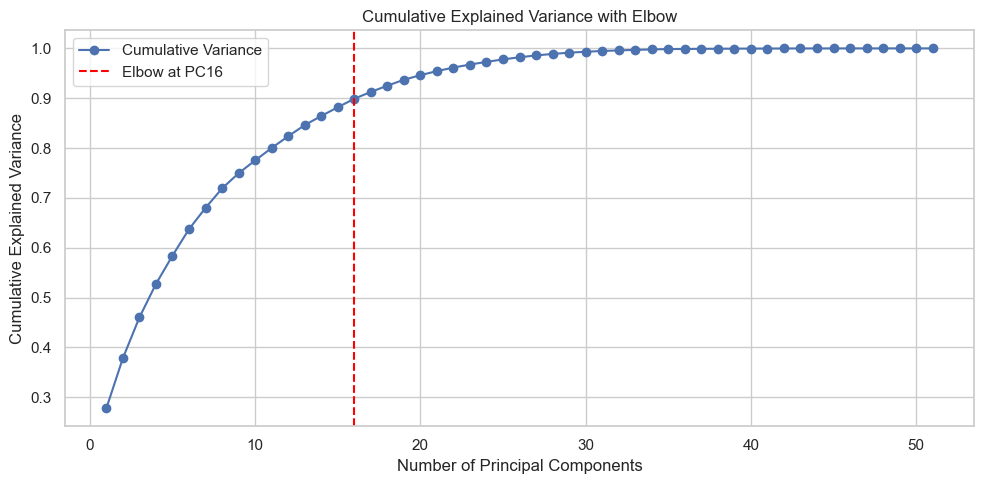

In [97]:
# Add metadata and emotion columns for plotting
X_pca_df['Phase'] = df['Phase']
for emo in emotion_targets:
    X_pca_df[emo] = df[emo]

# Scree Plot with Elbow Detection
cum_var = np.cumsum(pca.explained_variance_ratio_)
components = np.arange(1, len(cum_var) + 1)
knee = KneeLocator(components, cum_var, curve='concave', direction='increasing')
elbow_point = knee.knee
elbow_variance = cum_var[elbow_point - 1]

print(f"Elbow detected at PC{elbow_point}")
print(f"Explained variance at elbow: {elbow_variance:.2%}")
print(f"Number of components to keep: {elbow_point}")

plt.figure(figsize=(10, 5))
sns.set(style="whitegrid")
plt.plot(components, cum_var, marker='o', label='Cumulative Variance')
plt.axvline(x=elbow_point, color='red', linestyle='--', label=f'Elbow at PC{elbow_point}')
plt.title('Cumulative Explained Variance with Elbow')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.legend()
plt.tight_layout()
plt.show()


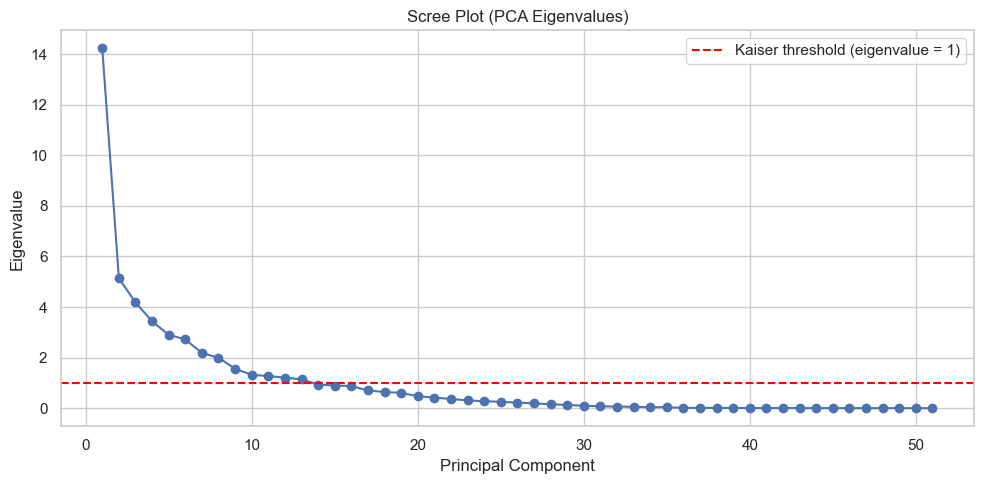

13 components have eigenvalues > 1


In [99]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import seaborn as sns
import numpy as np

# Fit PCA on scaled features
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Plot eigenvalues (not ratios)
eigenvalues = pca.explained_variance_

plt.figure(figsize=(10, 5))
sns.set(style="whitegrid")
plt.plot(range(1, len(eigenvalues) + 1), eigenvalues, marker='o')
plt.axhline(y=1, color='red', linestyle='--', label='Kaiser threshold (eigenvalue = 1)')
plt.title('Scree Plot (PCA Eigenvalues)')
plt.xlabel('Principal Component')
plt.ylabel('Eigenvalue')
plt.legend()
plt.tight_layout()
plt.show()

num_above_1 = sum(eigenvalues > 1)
print(f"{num_above_1} components have eigenvalues > 1")



In [101]:
np.cumsum(pca.explained_variance_ratio_)


array([0.27810621, 0.37858875, 0.46035015, 0.52744813, 0.58418799,
       0.63734865, 0.68002201, 0.71902507, 0.74950402, 0.77525084,
       0.80014267, 0.82375951, 0.84608735, 0.86436658, 0.88188263,
       0.89896105, 0.9126677 , 0.92516083, 0.9370554 , 0.94626993,
       0.95443326, 0.9615661 , 0.96758638, 0.97295759, 0.97792475,
       0.98216675, 0.98591879, 0.98889483, 0.99142163, 0.99329585,
       0.99476983, 0.99600359, 0.99708437, 0.99790182, 0.9986192 ,
       0.99888125, 0.99911359, 0.99932206, 0.9994961 , 0.99961749,
       0.99972728, 0.99982213, 0.99987151, 0.99990822, 0.99994175,
       0.99996325, 0.99998264, 0.99999008, 0.99999474, 0.99999874,
       1.        ])

In [49]:
- Get to understand which PC do we actually need to use

- Sparse PCA

_ visualise teh results (Biplot)

-----------------------------

1. Exploratory PCA
Scree plot + elbow

Plot PC1 vs PC2 (color by Phase, Frustrated, etc.)

Show loadings for PC1–PC3

******************************
    
2. Modeling with PCA
Use top 16 PCs

Run linear regression / PLS for each y_j

Compare RMSE or R² across methods and emotion variables

SyntaxError: invalid syntax (215183477.py, line 1)

C:\Users\snehi\AppData\Local\Temp\ipykernel_30784\4056008544.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_features.values, y=top_features.index, palette=colors)


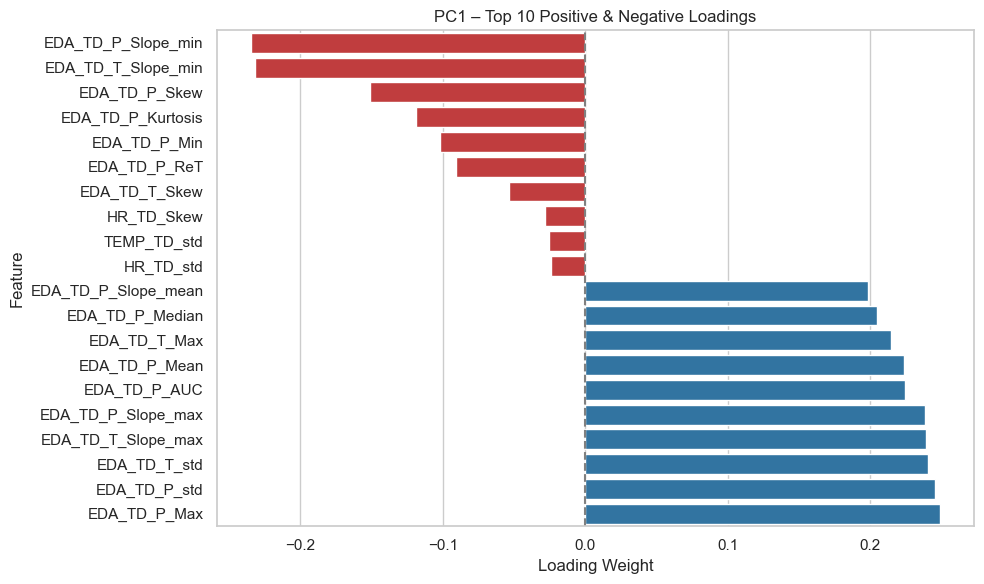

C:\Users\snehi\AppData\Local\Temp\ipykernel_30784\4056008544.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_features.values, y=top_features.index, palette=colors)


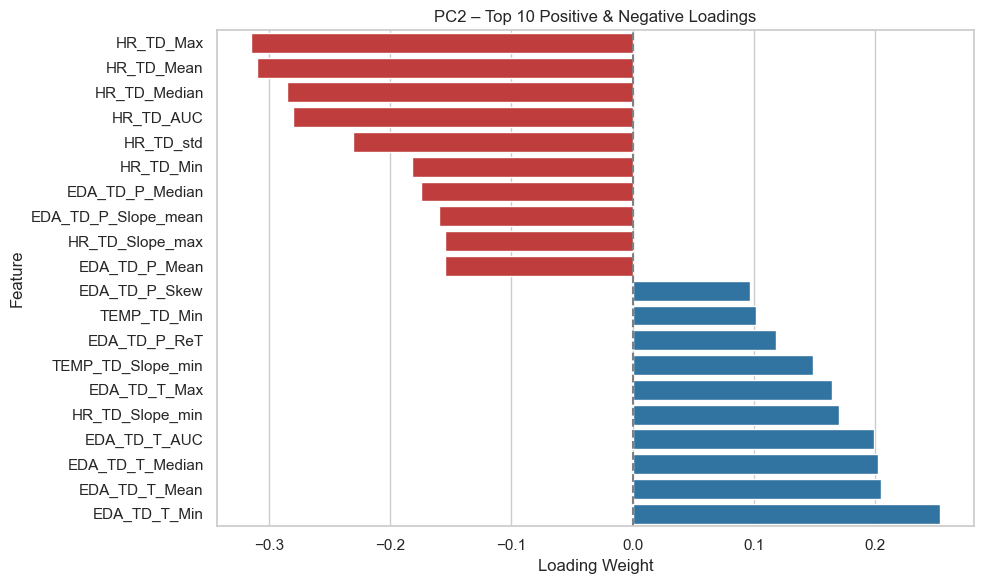

C:\Users\snehi\AppData\Local\Temp\ipykernel_30784\4056008544.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_features.values, y=top_features.index, palette=colors)


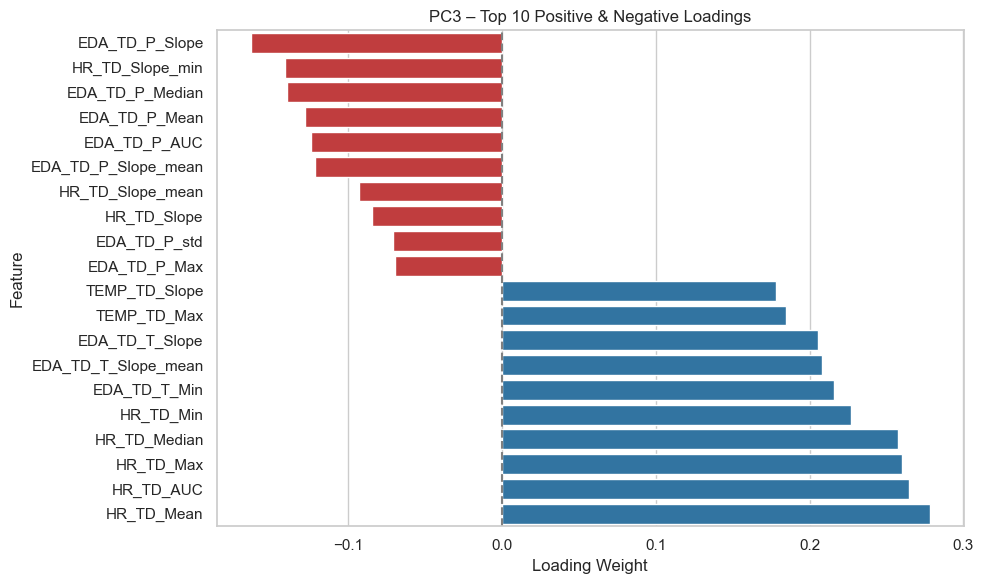

In [55]:
def plot_loadings(pc_num, top_n=10):
    pc = f'PC{pc_num}'
    sorted_loads = loadings[pc].sort_values()
    top_features = pd.concat([sorted_loads.head(top_n), sorted_loads.tail(top_n)])
    colors = ['#d62728' if v < 0 else '#1f77b4' for v in top_features]

    plt.figure(figsize=(10, 6))
    sns.barplot(x=top_features.values, y=top_features.index, palette=colors)
    plt.axvline(0, color='gray', linestyle='--')
    plt.title(f'{pc} – Top {top_n} Positive & Negative Loadings')
    plt.xlabel('Loading Weight')
    plt.ylabel('Feature')
    plt.tight_layout()
    plt.show()

# For PC1, PC2, PC3
plot_loadings(1)
plot_loadings(2)
plot_loadings(3)


In [109]:
pca_description = """
Principal Component 1 (PC1) primarily captures electrodermal activity (EDA) variability and intensity, 
with strong positive loadings from features such as `EDA_TD_P_Max`, `EDA_TD_P_std`, and `EDA_TD_P_AUC`, 
indicating that higher PC1 scores reflect elevated sympathetic responses and cumulative skin conductance responses. 

Principal Component 2 (PC2) contrasts cardiovascular reactivity against thermal and EDA steadiness; 
it has strong negative loadings from heart rate features (`HR_TD_Max`, `HR_TD_Mean`, `HR_TD_AUC`) 
and positive loadings from temperature and low-intensity EDA features, suggesting that PC2 differentiates 
between high heart-rate-driven responses and lower-response, thermally stable states. 

Principal Component 3 (PC3) emphasizes cardiovascular activation and thermoregulatory response, 
with high positive loadings from `HR_TD_Mean`, `TEMP_TD_Max`, and `EDA_TD_T_Slope`, while EDA slope 
and mean features load negatively, implying that PC3 reflects a physiological response pattern 
driven more by heart and temperature modulation than by EDA dynamics. 

Together, these components represent orthogonal axes of autonomic reactivity spanning 
EDA-dominant response (PC1), cardiac vs. calm-state contrast (PC2), and thermal-cardiovascular engagement (PC3).
"""

print(pca_description)


Principal Component 1 (PC1) primarily captures electrodermal activity (EDA) variability and intensity, 
with strong positive loadings from features such as `EDA_TD_P_Max`, `EDA_TD_P_std`, and `EDA_TD_P_AUC`, 
indicating that higher PC1 scores reflect elevated sympathetic responses and cumulative skin conductance responses. 

Principal Component 2 (PC2) contrasts cardiovascular reactivity against thermal and EDA steadiness; 
it has strong negative loadings from heart rate features (`HR_TD_Max`, `HR_TD_Mean`, `HR_TD_AUC`) 
and positive loadings from temperature and low-intensity EDA features, suggesting that PC2 differentiates 
between high heart-rate-driven responses and lower-response, thermally stable states. 

Principal Component 3 (PC3) emphasizes cardiovascular activation and thermoregulatory response, 
with high positive loadings from `HR_TD_Mean`, `TEMP_TD_Max`, and `EDA_TD_T_Slope`, while EDA slope 
and mean features load negatively, implying that PC3 reflects a physiological r

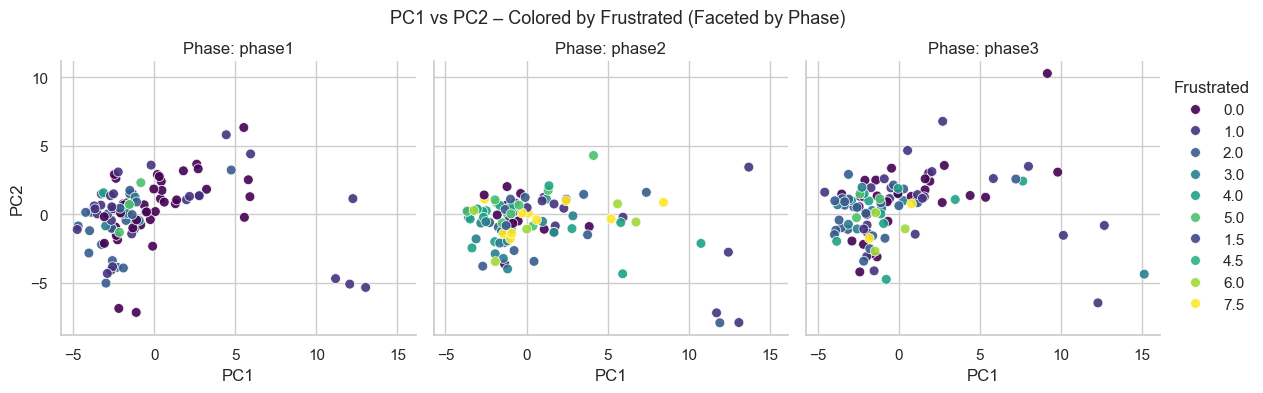

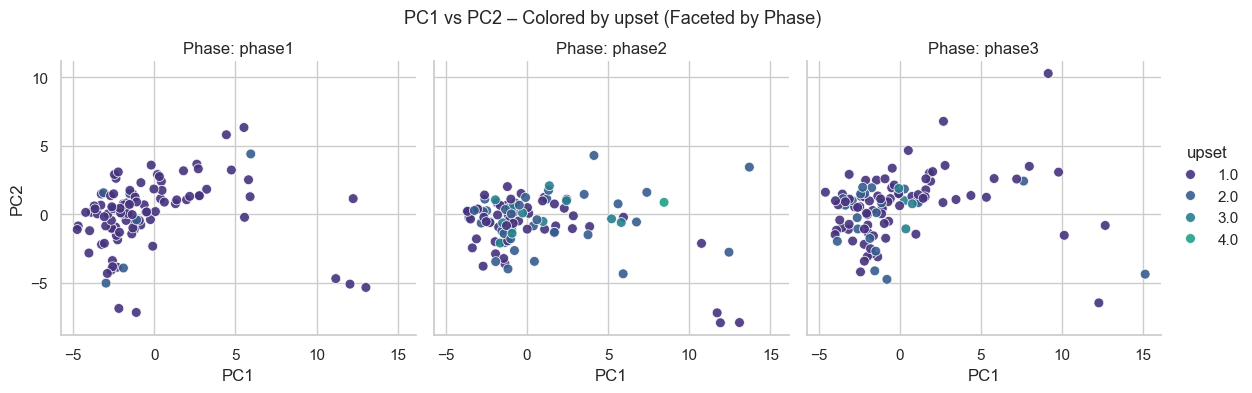

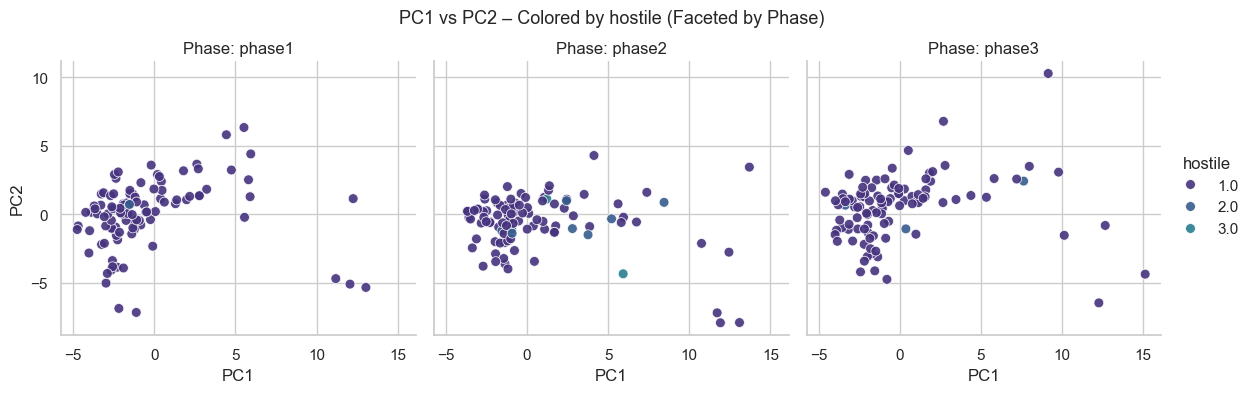

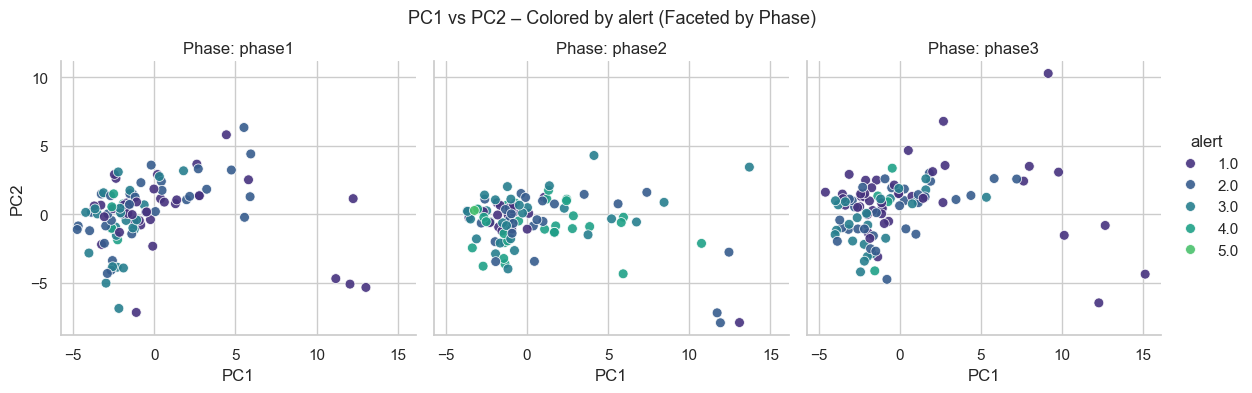

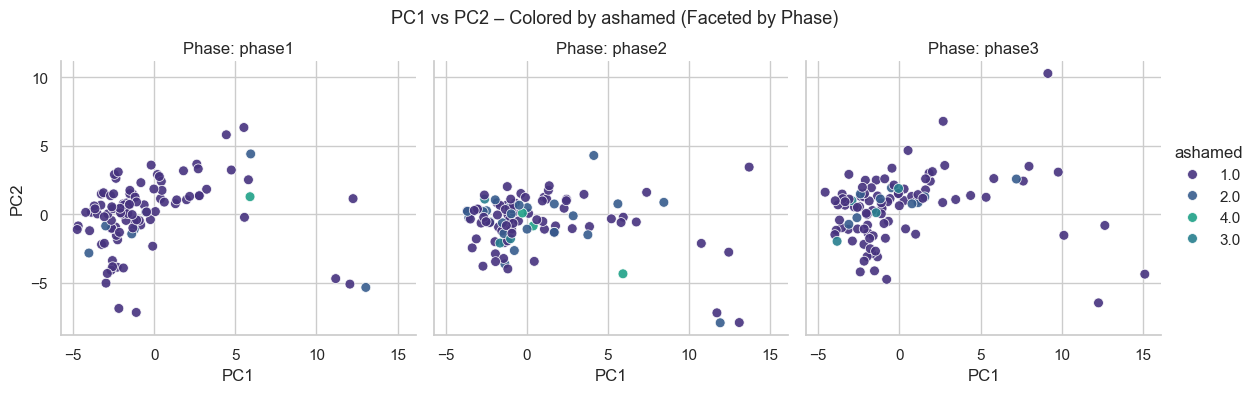

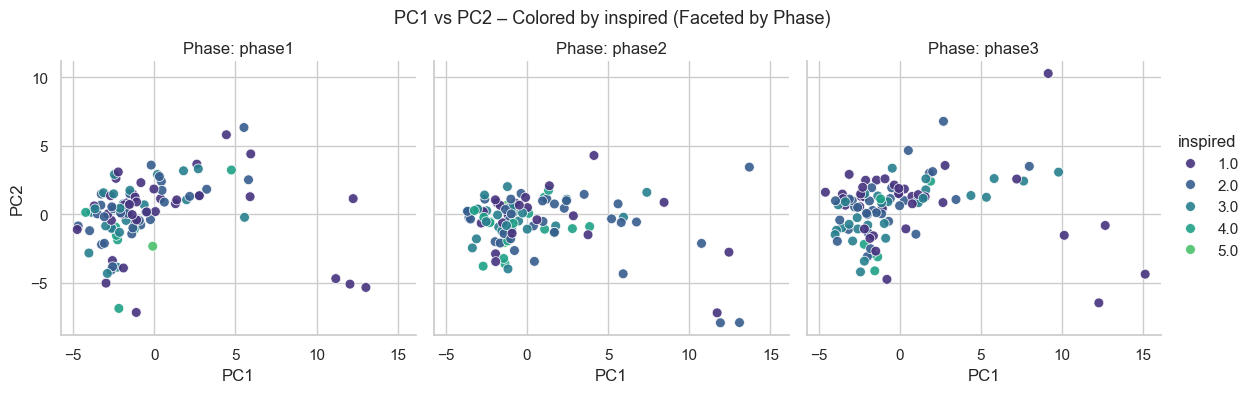

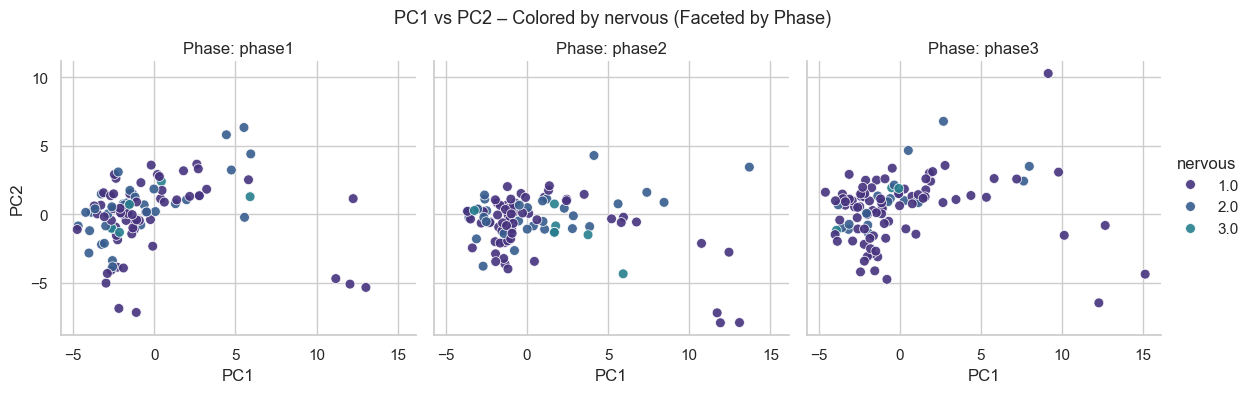

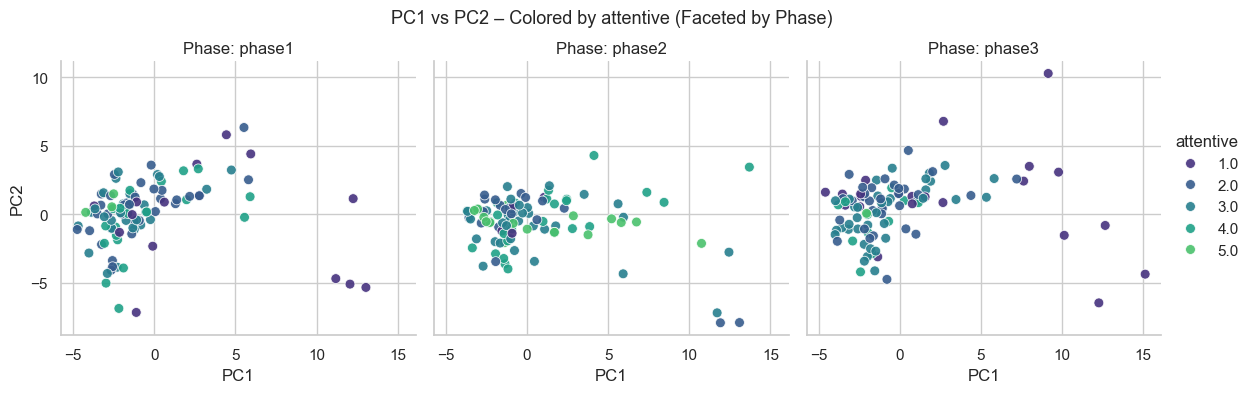

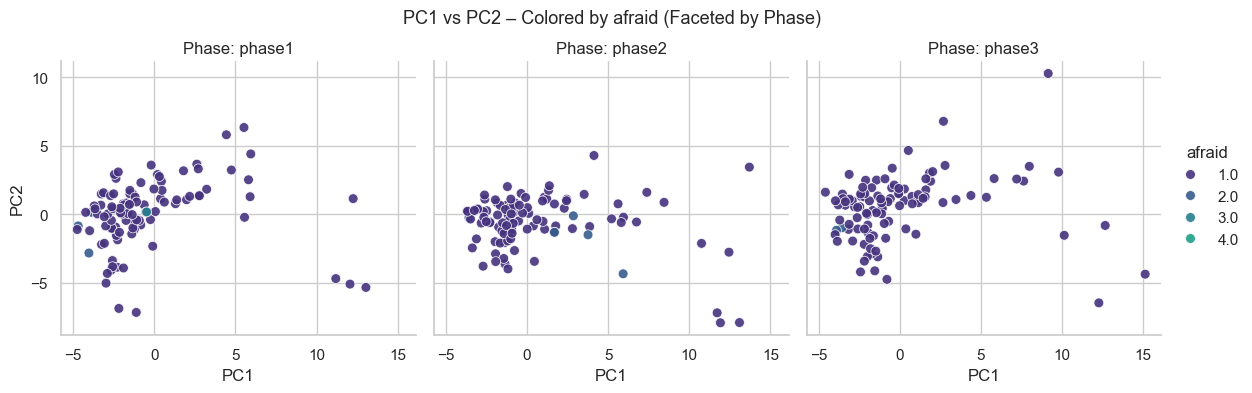

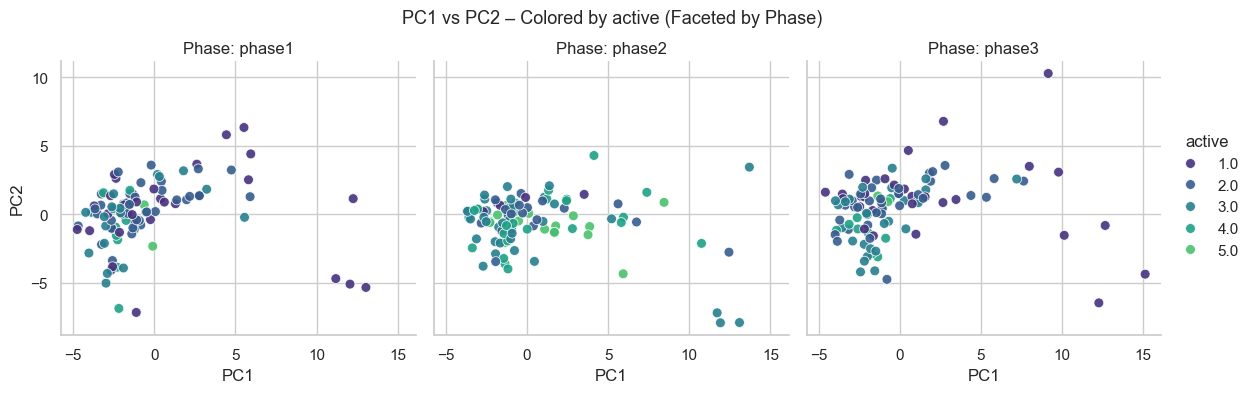

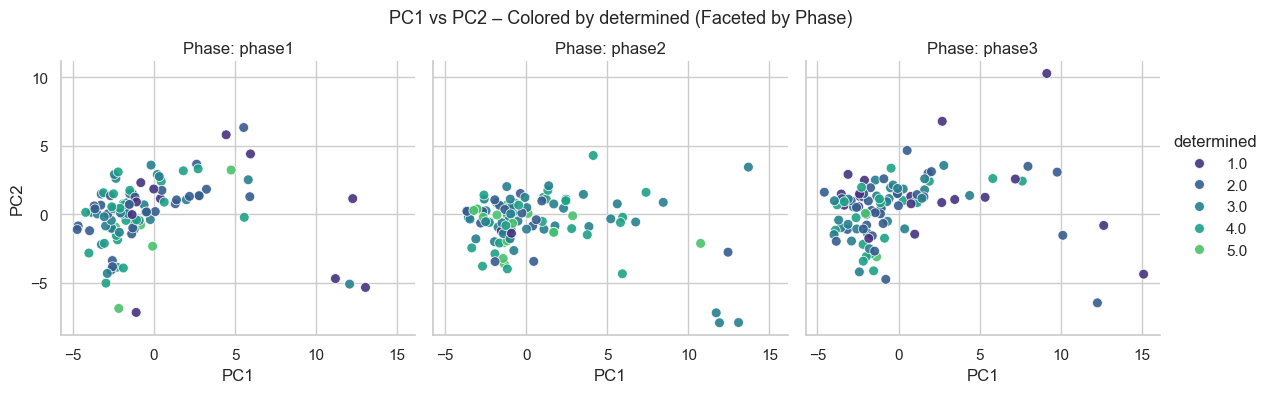

In [127]:
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.api.types import CategoricalDtype

# Ensure emotion scores and Phase are in your PCA dataframe
emotion_cols = ['Frustrated', 'upset', 'hostile', 'alert', 'ashamed',
                'inspired', 'nervous', 'attentive', 'afraid', 'active', 'determined']

X_pca_df['Phase'] = df['Phase']  # Add Phase for faceting

global_min = 0
global_max = 7  

# Ensure correct phase order
phase_order = CategoricalDtype(categories=['phase1', 'phase2', 'phase3'], ordered=True)
X_pca_df['Phase'] = X_pca_df['Phase'].astype(phase_order)

for emo in emotion_cols:
    X_pca_df[emo] = df[emo].astype(float)

    g = sns.FacetGrid(X_pca_df, col='Phase', height=4, aspect=1)
    g.map_dataframe(
        sns.scatterplot,
        x='PC1', y='PC2',
        hue=emo,
        palette='viridis',
        s=50, alpha=0.9,
        hue_norm=(global_min, global_max)  
    )

    g.add_legend(title=emo)
    g.set_axis_labels('PC1', 'PC2')
    g.set_titles(col_template='Phase: {col_name}')
    plt.subplots_adjust(top=0.85)
    g.fig.suptitle(f'PC1 vs PC2 – Colored by {emo} (Faceted by Phase)', fontsize=13)
    plt.show()




In [131]:
#Not sure how relevant this would be - still need to look into it
import plotly.express as px

# Loop over each emotion and generate 3D PCA plot
for emo in emotion_targets:
    fig = px.scatter_3d(
        X_pca_df,
        x='PC1', y='PC2', z='PC3',
        color=emo,
        symbol='Phase',
        title=f'3D PCA – PC1 vs PC2 vs PC3 colored by {emo}',
        color_continuous_scale='Viridis'
    )

    fig.update_traces(marker=dict(size=5))
    fig.show()


C:\Users\snehi\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning:

'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.

C:\Users\snehi\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning:

'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.

C:\Users\snehi\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning:

'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.

C:\Users\snehi\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning:

'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.

C:\Users


Performance using PCA (top 16 components):
       Emotion      RMSE        R2
9       active  1.142135  0.140815
10  determined  1.042556  0.077417
7    attentive  1.067155  0.059905
6      nervous  0.589690  0.050785
0   Frustrated  2.195463  0.044224
1        upset  0.752827 -0.004208
2      hostile  0.365016 -0.020879
5     inspired  1.112394 -0.033528
4      ashamed  0.633906 -0.036990
3        alert  1.076895 -0.060566
8       afraid  0.464247 -0.110935


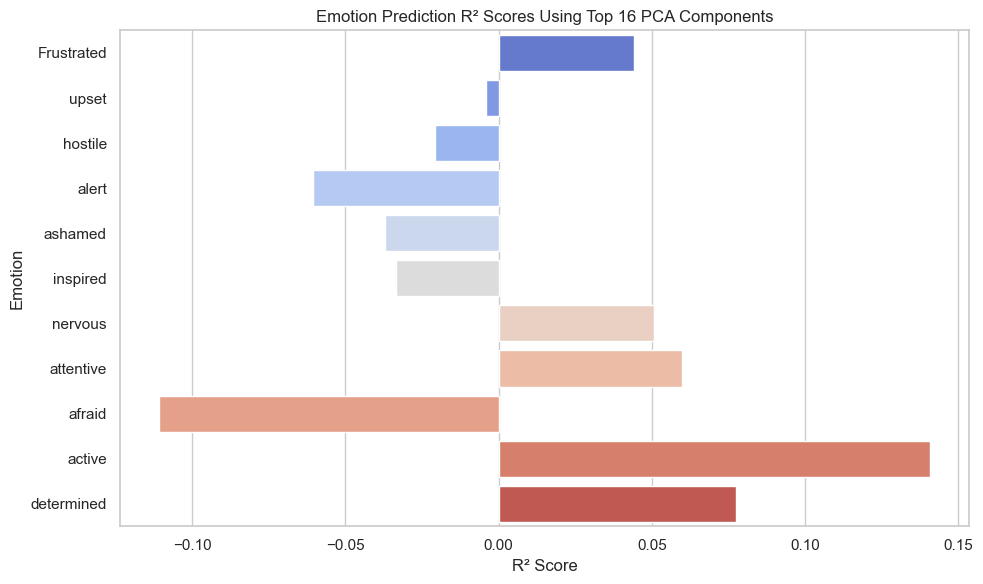

In [139]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

# Use top 16 components based on elbow (or fixed choice)
X_pca_16 = X_pca[:, :16]

# Regression modeling for each emotion
y_results = []
for target in emotion_targets:
    y = df[target].values
    X_train, X_test, y_train, y_test = train_test_split(X_pca_16, y, test_size=0.2, random_state=42)

    model = LinearRegression()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    rmse = mean_squared_error(y_test, y_pred, squared=False)
    r2 = r2_score(y_test, y_pred)

    y_results.append({"Emotion": target, "RMSE": rmse, "R2": r2})

# Results summary
y_results_df = pd.DataFrame(y_results)
print("\nPerformance using PCA (top 16 components):")
print(y_results_df.sort_values(by='R2', ascending=False))

# Optional: Plot R² for each emotion
plt.figure(figsize=(10, 6))
sns.barplot(data=y_results_df, x='R2', y='Emotion', palette='coolwarm')
plt.title('Emotion Prediction R² Scores Using Top 16 PCA Components')
plt.xlabel('R² Score')
plt.ylabel('Emotion')
plt.tight_layout()
plt.show()

